<a href="https://colab.research.google.com/github/adrielsvr/Sentimen-Analisis-Publik-terhadap-Transportasi-Kereta-di-Jakarta/blob/main/Pemodelan/Pemodelan_Data_MRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from google.colab import drive
from collections import Counter
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_mrt = '/content/drive/MyDrive/Tugas Akhir/Dataset Twitter/Dataset/Data_MRT_Label_Sentiment.csv'
data_mrt = pd.read_csv(path_mrt)
data_mrt

,full_text,clean_text,normalisasi,tokenized_text,stopwords_removal,stemming,polarity_score,sentiment
0,Ada Perubahan Jadwal Operasional MRT Jakarta S...,ada perubahan jadwal operasional mrt jakarta s...,ada perubahan jadwal operasional mrt jakarta s...,"['ada', 'perubahan', 'jadwal', 'operasional', ...","['perubahan', 'jadwal', 'operasional', 'mrt', ...",ubah jadwal operasional mrt jakarta malam tahu...,-5,Negatif
1,@UGM_FESS 4. Lebih bagus lagi kalo bisa pelaja...,lebih bagus lagi kalo bisa pelajari halte yg...,lebih bagus lagi kalau bisa pelajari halte yan...,"['lebih', 'bagus', 'lagi', 'kalau', 'bisa', 'p...","['lebih', 'bagus', 'kalau', 'pelajari', 'halte...",lebih bagus kalau ajar halte nyambung krl mrt ...,-15,Negatif
2,https://t.co/qCPONlISDS Bali needs airport tra...,bali needs airport train,bali needs airport train,"['bali', 'needs', 'airport', 'train']","['bali', 'needs', 'airport', 'train']",bal needs airport train,0,Netral
3,"@WatchmenID Terlalu fokus dengan perang, bom d...",terlalu fokus dengan perang bom dan aksi laga...,terlalu fokus dengan perang bom dan aksi laga ...,"['terlalu', 'fokus', 'dengan', 'perang', 'bom'...","['terlalu', 'fokus', 'perang', 'bom', 'aksi', ...",terlalu fokus perang bom aksi laga lain lupa h...,-36,Negatif
4,siapa disini yg cita-cita nya strolling arroun...,siapa disini yg citacita nya strolling arround...,siapa disini yang citacita nya strolling arrou...,"['siapa', 'disini', 'yang', 'citacita', 'nya',...","['siapa', 'disini', 'citacita', 'nya', 'stroll...",siapa sini citacita nya strolling arround jaka...,-8,Negatif
...,...,...,...,...,...,...,...,...
8608,@zakurbaee Pastiin udah donlot apps MRT Jakart...,pastiin udah donlot apps mrt jakarta juga nan...,pastiin sudah donlot aplikasi mrt jakarta juga...,"['pastiin', 'sudah', 'donlot', 'aplikasi', 'mr...","['pastiin', 'donlot', 'aplikasi', 'mrt', 'jaka...",pastiin donlot aplikasi mrt jakarta menu tiket...,-18,Negatif
8609,Lucu juga kali ya kalau station jingle-nya @mr...,lucu juga kali ya kalau station jinglenya sena...,lucu juga kali ya kalau station jinglenya sena...,"['lucu', 'juga', 'kali', 'ya', 'kalau', 'stati...","['lucu', 'kali', 'kalau', 'station', 'jingleny...",lucu kali kalau station jinglenya senayan hara...,-9,Negatif
8610,"Salah kamu, jelas : Itu isyarat bahwa segala ...",salah kamu jelas itu isyarat bahwa segala pemb...,salah kamu jelas itu isyarat bahwa segala pemb...,"['salah', 'kamu', 'jelas', 'itu', 'isyarat', '...","['salah', 'kamu', 'jelas', 'isyarat', 'segala'...",salah kamu jelas isyarat segala bangun anies h...,-20,Negatif
8611,"Berandai2 kalo udah jadi, semoga dari Cilegon ...",berandai kalo udah jadi semoga dari cilegon ad...,berandai kalau sudah jadi semoga dari cilegon ...,"['berandai', 'kalau', 'sudah', 'jadi', 'semoga...","['berandai', 'kalau', 'jadi', 'semoga', 'cileg...",beranda kalau jadi moga cilegon shuttle minima...,-13,Negatif


## MRT

In [ ]:
tfidf = TfidfVectorizer(max_features=2500, min_df=8, max_df=0.7)
X = tfidf.fit_transform(data_mrt['stemming']).toarray()
y = np.array(data_mrt['sentiment'])

encode = LabelEncoder()
y = encode.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

- 0 --> Sentimen Negatif
- 1 --> Sentimen Netral
- 2 --> Sentimen Positif

Parameter terbaik: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
from sklearn.svm import SVC

# Inisialisasi model SVM
svc = SVC(kernel='rbf', C=10, gamma=1, probability=True)

# Latih model
model = svc.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)

# Evaluasi model
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       651
           1       0.71      0.47      0.57        74
           2       0.81      0.60      0.69       137

    accuracy                           0.87       862
   macro avg       0.80      0.68      0.73       862
weighted avg       0.86      0.87      0.86       862



In [ ]:
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f'Accuracy Score   : {(acc_svm * 100):.2f}')
print(f'Precision Score  : {(prec_svm * 100):.2f}')
print(f'Recall Score     : {(recall_svm * 100):.2f}')
print(f'f1-score         : {(f1_svm * 100):.2f}')

Accuracy Score   : 86.89
Precision Score  : 86.07
Recall Score     : 86.89
f1-score         : 85.87


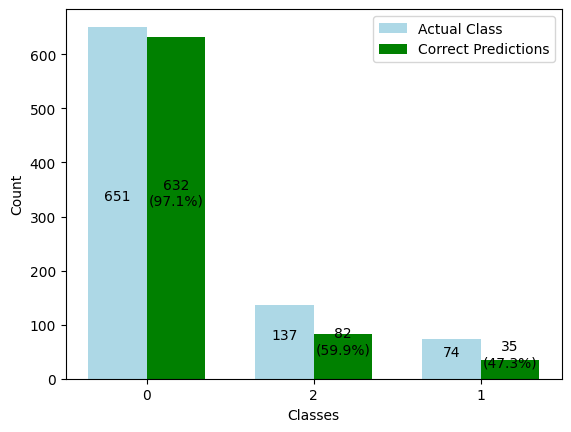

In [ ]:
# Hitung jumlah prediksi yang benar dan total untuk setiap kelas
correct_predictions = Counter()
total_predictions = Counter()

for true, pred in zip(y_test, y_pred_svm):
    total_predictions[true] += 1
    if true == pred:
        correct_predictions[true] += 1

# Buat plot batang
labels = list(total_predictions.keys())
total_counts = list(total_predictions.values())
correct_counts = [correct_predictions[label] for label in labels]

fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(labels))

bar1 = ax.bar(index, total_counts, bar_width, label='Actual Class', color='lightblue')
bar2 = ax.bar(index + bar_width, correct_counts, bar_width, label='Correct Predictions', color='green')

# Tambahkan label dan persentase
for i, (total, correct) in enumerate(zip(total_counts, correct_counts)):
    ax.text(i, total/2, str(total), ha='center', va='bottom')
    percentage = (correct / total) * 100 if total > 0 else 0
    ax.text(i + bar_width, correct/2, f'{correct}\n({percentage:.1f}%)', ha='center', va='bottom')

ax.set_xlabel('Classes')
ax.set_ylabel('Count')
# ax.set_title('Prediction Accuracy by Class')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

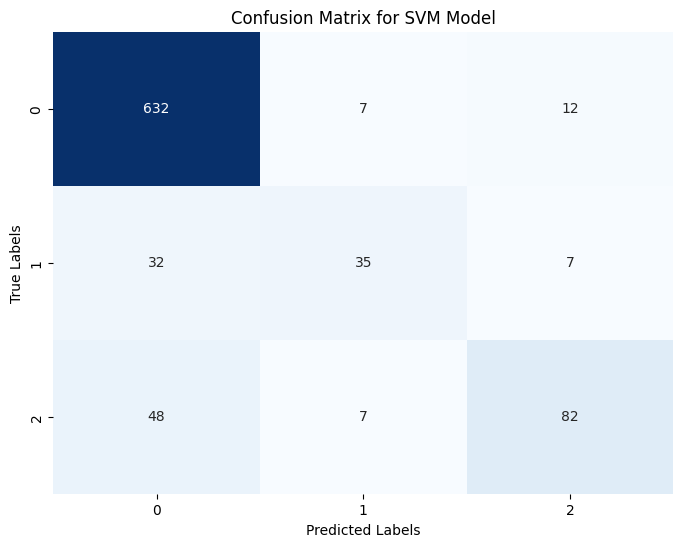

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Model')
plt.show()

{'C': 10, 'solver': 'liblinear', 'tol': 0.001}

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model logistic regression
logreg = LogisticRegression(solver='liblinear', C=10, tol=0.001)

# Latih model
model = logreg.fit(X_train, y_train)
y_pred_logreg = model.predict(X_test)

# Evaluasi model
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       651
           1       0.71      0.47      0.57        74
           2       0.81      0.74      0.77       137

    accuracy                           0.89       862
   macro avg       0.81      0.72      0.76       862
weighted avg       0.88      0.89      0.88       862



In [ ]:
acc_logreg = accuracy_score(y_test, y_pred_logreg)
prec_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

print(f'Accuracy Score   : {(acc_logreg * 100):.2f}')
print(f'Precision Score  : {(prec_logreg * 100):.2f}')
print(f'Recall Score     : {(recall_logreg * 100):.2f}')
print(f'f1-score         : {(f1_logreg * 100):.2f}')

Accuracy Score   : 88.63
Precision Score  : 87.91
Recall Score     : 88.63
f1-score         : 87.97


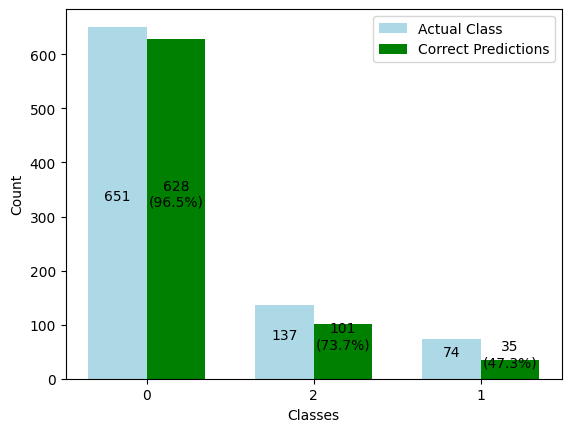

In [ ]:
# Hitung jumlah prediksi yang benar dan total untuk setiap kelas
correct_predictions = Counter()
total_predictions = Counter()

for true, pred in zip(y_test, y_pred_logreg):
    total_predictions[true] += 1
    if true == pred:
        correct_predictions[true] += 1

# Buat plot batang
labels = list(total_predictions.keys())
total_counts = list(total_predictions.values())
correct_counts = [correct_predictions[label] for label in labels]

fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(labels))

bar1 = ax.bar(index, total_counts, bar_width, label='Actual Class', color='lightblue')
bar2 = ax.bar(index + bar_width, correct_counts, bar_width, label='Correct Predictions', color='green')

# Tambahkan label dan persentase
for i, (total, correct) in enumerate(zip(total_counts, correct_counts)):
    ax.text(i, total/2, str(total), ha='center', va='bottom')
    percentage = (correct / total) * 100 if total > 0 else 0
    ax.text(i + bar_width, correct/2, f'{correct}\n({percentage:.1f}%)', ha='center', va='bottom')

ax.set_xlabel('Classes')
ax.set_ylabel('Count')
# ax.set_title('Prediction Accuracy by Class')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Text(70.72222222222221, 0.5, 'True Labels')

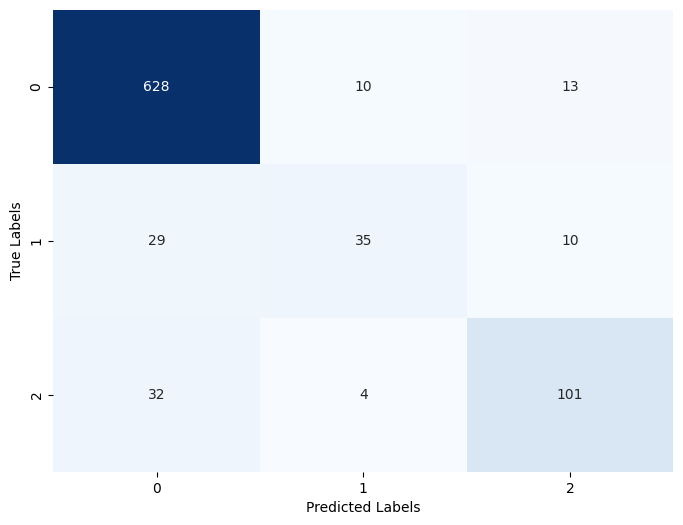

In [ ]:
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [ ]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# Reshape data for CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Initialize CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dense(y_train_cat.shape[1], activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train_cat, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
_, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test_cat, verbose=0)
print(f"CNN Accuracy: {cnn_acc * 100:.2f}%")

# Make predictions
cnn_pred = cnn_model.predict(X_test_cnn)
cnn_pred_classes = np.argmax(cnn_pred, axis=1)
cnn_val_classes = np.argmax(y_test_cat, axis=1)

# Calculate metrics
cnn_accuracy = accuracy_score(cnn_val_classes, cnn_pred_classes)
cnn_precision_weighted = precision_score(cnn_val_classes, cnn_pred_classes, average='weighted')
cnn_recall_weighted = recall_score(cnn_val_classes, cnn_pred_classes, average='weighted')
cnn_f1_weighted = f1_score(cnn_val_classes, cnn_pred_classes, average='weighted')

print(classification_report(y_test, cnn_pred_classes))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - accuracy: 0.7532 - loss: 0.6530
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.8661 - loss: 0.3500
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.9193 - loss: 0.2268
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.9480 - loss: 0.1595
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.9692 - loss: 0.0971
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.9887 - loss: 0.0545
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9906 - loss: 0.0350
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.9942 - loss: 0.0256
Epoch 9/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 21s 68ms/step - accuracy: 0.9944 - loss: 0.0211
Epoch 10/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.9960 - loss: 0.0183
CNN Accuracy: 86.08%
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
              precision    recall  f1-score   support

   

In [ ]:
acc_cnn = accuracy_score(y_test, cnn_pred_classes)
prec_cnn = precision_score(y_test, cnn_pred_classes, average='weighted')
recall_cnn = recall_score(y_test, cnn_pred_classes, average='weighted')
f1_cnn = f1_score(y_test, cnn_pred_classes, average='weighted')

print(f'Accuracy Score   : {(acc_cnn * 100):.2f}')
print(f'Precision Score  : {(prec_cnn * 100):.2f}')
print(f'Recall Score     : {(recall_cnn * 100):.2f}')
print(f'f1-score         : {(f1_cnn * 100):.2f}')

Accuracy Score   : 86.08
Precision Score  : 86.12
Recall Score     : 86.08
f1-score         : 86.09


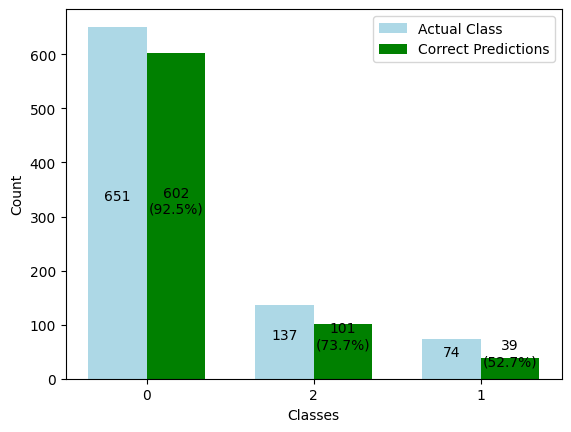

In [ ]:
# Hitung jumlah prediksi yang benar dan total untuk setiap kelas
correct_predictions = Counter()
total_predictions = Counter()

for true, pred in zip(y_test, cnn_pred_classes):
    total_predictions[true] += 1
    if true == pred:
        correct_predictions[true] += 1

# Buat plot batang
labels = list(total_predictions.keys())
total_counts = list(total_predictions.values())
correct_counts = [correct_predictions[label] for label in labels]

fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(labels))

bar1 = ax.bar(index, total_counts, bar_width, label='Actual Class', color='lightblue')
bar2 = ax.bar(index + bar_width, correct_counts, bar_width, label='Correct Predictions', color='green')

# Tambahkan label dan persentase
for i, (total, correct) in enumerate(zip(total_counts, correct_counts)):
    ax.text(i, total/2, str(total), ha='center', va='bottom')
    percentage = (correct / total) * 100 if total > 0 else 0
    ax.text(i + bar_width, correct/2, f'{correct}\n({percentage:.1f}%)', ha='center', va='bottom')

ax.set_xlabel('Classes')
ax.set_ylabel('Count')
# ax.set_title('Prediction Accuracy by Class')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Text(0.5, 1.0, 'Confusion Matrix for CNN Model')

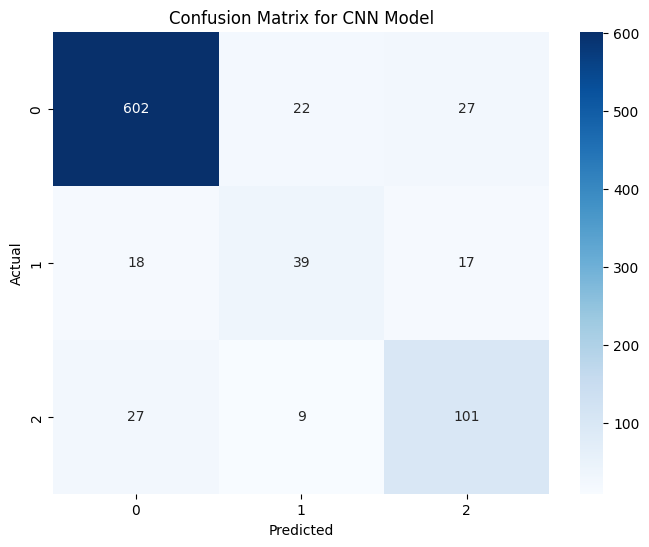

In [ ]:
cm = confusion_matrix(y_test, cnn_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CNN Model')

In [ ]:
svm_proba = svc.predict_proba(X_test)
logreg_proba = logreg.predict_proba(X_test)
cnn_proba = cnn_pred

avg_proba = (svm_proba + logreg_proba + cnn_proba) / 3
soft_voting = np.argmax(avg_proba, axis=1)

In [ ]:
# Hybrid model with voting
combine_vote = []

for i in range(len(X_test)):
    if y_pred_svm[i] == y_pred_logreg[i] or y_pred_svm[i] == cnn_pred_classes[i]:
        combine_vote.append(y_pred_svm[i])
    elif y_pred_logreg[i] == cnn_pred_classes[i]:
        combine_vote.append(y_pred_logreg[i])
    else:
        combine_vote.append(soft_voting[i])

# Menampilkan laporan klasifikasi dari model hybrid
print("Hybrid Model Classification Report:")
print(classification_report(y_test, combine_vote))

Hybrid Model Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       651
           1       0.68      0.49      0.57        74
           2       0.82      0.72      0.76       137

    accuracy                           0.89       862
   macro avg       0.80      0.72      0.76       862
weighted avg       0.88      0.89      0.88       862



In [ ]:
acc_hybrid = accuracy_score(y_test, combine_vote)
prec_hybrid = precision_score(y_test, combine_vote, average='weighted')
recall_hybrid = recall_score(y_test, combine_vote, average='weighted')
f1_hybrid = f1_score(y_test, combine_vote, average='weighted')

print(f'Accuracy Score   : {(acc_hybrid * 100):.2f}')
print(f'Precision Score  : {(prec_hybrid * 100):.2f}')
print(f'Recall Score     : {(recall_hybrid * 100):.2f}')
print(f'f1-score         : {(f1_hybrid * 100):.2f}')

Accuracy Score   : 88.63
Precision Score  : 87.87
Recall Score     : 88.63
f1-score         : 88.00


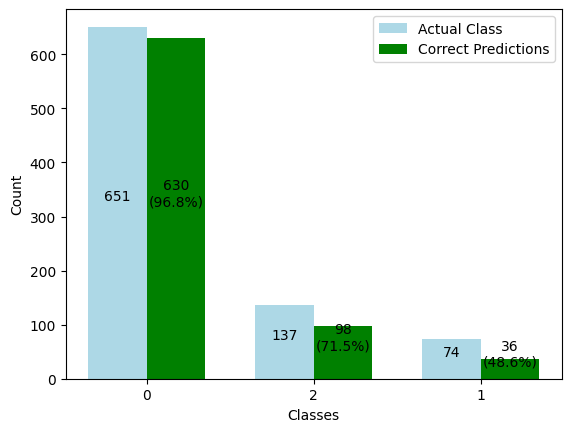

In [ ]:
# Hitung jumlah prediksi yang benar dan total untuk setiap kelas
correct_predictions = Counter()
total_predictions = Counter()

for true, pred in zip(y_test, combine_vote):
    total_predictions[true] += 1
    if true == pred:
        correct_predictions[true] += 1

# Buat plot batang
labels = list(total_predictions.keys())
total_counts = list(total_predictions.values())
correct_counts = [correct_predictions[label] for label in labels]

fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(labels))

bar1 = ax.bar(index, total_counts, bar_width, label='Actual Class', color='lightblue')
bar2 = ax.bar(index + bar_width, correct_counts, bar_width, label='Correct Predictions', color='green')

# Tambahkan label dan persentase
for i, (total, correct) in enumerate(zip(total_counts, correct_counts)):
    ax.text(i, total/2, str(total), ha='center', va='bottom')
    percentage = (correct / total) * 100 if total > 0 else 0
    ax.text(i + bar_width, correct/2, f'{correct}\n({percentage:.1f}%)', ha='center', va='bottom')

ax.set_xlabel('Classes')
ax.set_ylabel('Count')
# ax.set_title('Prediction Accuracy by Class')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Text(0.5, 1.0, 'Confusion Matrix for Hybrid Model')

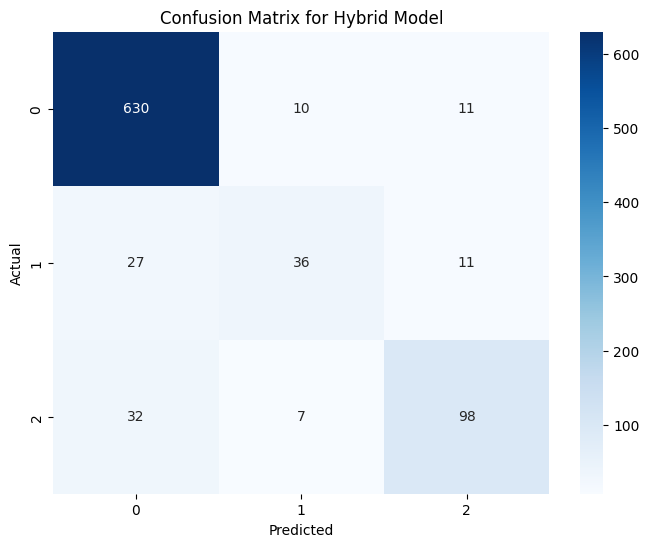

In [ ]:
cm = confusion_matrix(y_test, combine_vote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Hybrid Model')

In [ ]:
count_correct = []
for i in range (len(y_test)):
  if y_test[i] == combine_vote[i]:
    count_correct.append(1)
  else:
    count_correct.append(0)

acc_conf = sum(count_correct)/len(y_test)

print(f'SVM Accuracy : {acc_svm}')
print(f'Logistic Regression Accuracy : {acc_logreg}')
print(f'CNN Accuracy : {acc_cnn}')
print(f'Hybrid Model Accuracy : {acc_hybrid}')

if acc_conf == acc_hybrid :
  print('accuracy hybrid model and confusion matrix is match')
else:
  print('accuracy hybrid model and confusion matrix is not match')

SVM Accuracy : 0.8689095127610209
Logistic Regression Accuracy : 0.8863109048723898
CNN Accuracy : 0.8607888631090487
Hybrid Model Accuracy : 0.8863109048723898
accuracy hybrid model and confusion matrix is match


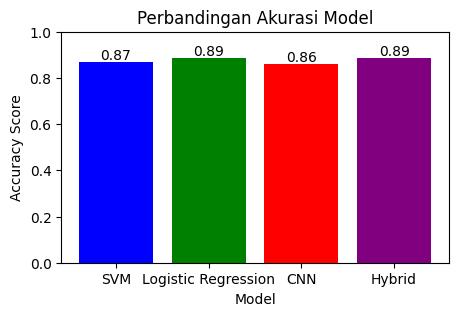

In [ ]:
# prompt: buatkan perbandingan accuracy score dari 4 model sebelumnya

import matplotlib.pyplot as plt
# Data Akurasi
models = ['SVM', 'Logistic Regression', 'CNN', 'Hybrid']
accuracy_scores = [acc_svm, acc_logreg, acc_cnn, acc_hybrid]

# Membuat plot batang
plt.figure(figsize=(5, 3))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1)  # Set batas sumbu y dari 0 hingga 1

# Menampilkan nilai akurasi di atas setiap batang
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.show()

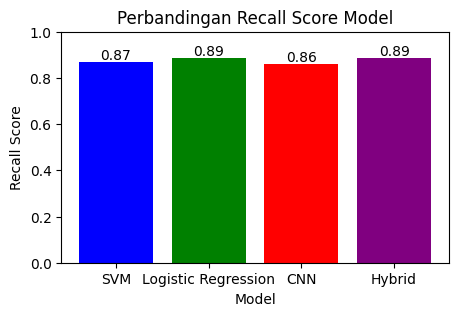

In [ ]:
# prompt: buatkan perbandingan recall score dari 4 model

import matplotlib.pyplot as plt
# Data Recall Score
models = ['SVM', 'Logistic Regression', 'CNN', 'Hybrid']
recall_scores = [recall_svm, recall_logreg, recall_cnn, recall_hybrid]

# Membuat plot batang
plt.figure(figsize=(5, 3))
plt.bar(models, recall_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Recall Score')
plt.title('Perbandingan Recall Score Model')
plt.ylim(0, 1)  # Set batas sumbu y dari 0 hingga 1

# Menampilkan nilai recall score di atas setiap batang
for i, score in enumerate(recall_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.show()


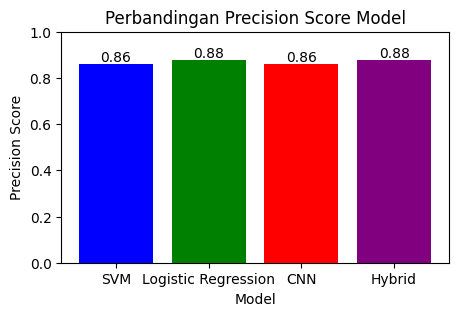

In [ ]:
# prompt: perbandingan precision 4 model

import matplotlib.pyplot as plt
# Data Precision Score
models = ['SVM', 'Logistic Regression', 'CNN', 'Hybrid']
precision_scores = [prec_svm, prec_logreg, prec_cnn, prec_hybrid]

# Membuat plot batang
plt.figure(figsize=(5, 3))
plt.bar(models, precision_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Precision Score')
plt.title('Perbandingan Precision Score Model')
plt.ylim(0, 1)  # Set batas sumbu y dari 0 hingga 1

# Menampilkan nilai precision score di atas setiap batang
for i, score in enumerate(precision_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.show()


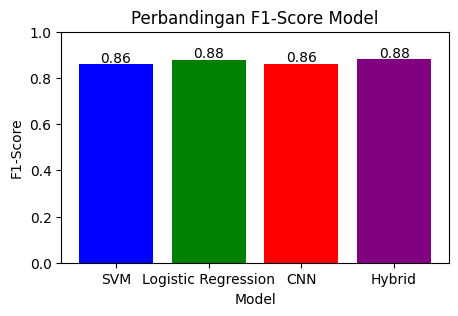

In [ ]:
# prompt: perbandingan f1 score 4 model

import matplotlib.pyplot as plt
# Data F1-Score
models = ['SVM', 'Logistic Regression', 'CNN', 'Hybrid']
f1_scores = [f1_svm, f1_logreg, f1_cnn, f1_hybrid]

# Membuat plot batang
plt.figure(figsize=(5, 3))
plt.bar(models, f1_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('Perbandingan F1-Score Model')
plt.ylim(0, 1)  # Set batas sumbu y dari 0 hingga 1

# Menampilkan nilai F1-Score di atas setiap batang
for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

plt.show()

In [ ]:
print('Akurasi')
print(f'SVM Accuracy : {acc_svm:.2f}')
print(f'Logistic Regression Accuracy : {acc_logreg:.2f}')
print(f'CNN Accuracy : {acc_cnn:.2f}')
print(f'Hybrid Model Accuracy : {acc_hybrid:.2f}\n')
print('precision')
print(f'SVM Precision : {prec_svm:.2f}')
print(f'Logistic Regression Precision : {prec_logreg:.2f}')
print(f'CNN Precision : {prec_cnn:.2f}')
print(f'Hybrid Model Precision : {prec_hybrid:.2f}\n')
print('recall')
print(f'SVM Recall : {recall_svm:.2f}')
print(f'Logistic Regression Recall : {recall_logreg:.2f}')
print(f'CNN Recall : {recall_cnn:.2f}')
print(f'Hybrid Model Recall : {recall_hybrid:.2f}\n')
print('f1-score')
print(f'SVM F1-Score : {f1_svm:.2f}')
print(f'Logistic Regression F1-Score : {f1_logreg:.2f}')
print(f'CNN F1-Score : {f1_cnn:.2f}')
print(f'Hybrid Model F1-Score : {f1_hybrid:.2f}')

Akurasi
SVM Accuracy : 0.87
Logistic Regression Accuracy : 0.89
CNN Accuracy : 0.86
Hybrid Model Accuracy : 0.89

precision
SVM Precision : 0.86
Logistic Regression Precision : 0.88
CNN Precision : 0.86
Hybrid Model Precision : 0.88

recall
SVM Recall : 0.87
Logistic Regression Recall : 0.89
CNN Recall : 0.86
Hybrid Model Recall : 0.89

f1-score
SVM F1-Score : 0.86
Logistic Regression F1-Score : 0.88
CNN F1-Score : 0.86
Hybrid Model F1-Score : 0.88


In [ ]:
count_correct = []
for i in range (len(y_test)):
  if y_test[i] == combine_vote[i]:
    count_correct.append(1)
  else:
    count_correct.append(0)

acc_conf = sum(count_correct)/len(y_test)

if acc_conf == acc_hybrid :
  print('hybrid model and confusion matrix is match')
else:
  print('hybrid model and confusion matrix is not match')

hybrid model and confusion matrix is match
